# Одиннадцатая лабораторная работа
Андрей Алексеевич, группа 20201

In [1]:
import thinkdsp as td
import numpy as np
import matplotlib.pyplot as plt

## Задание 1.
Вернуться к примеру "Соло на барабане", применить фильтр НЧ до выборки и для удаления спектральных копий, вызванных выборкой. Изучить подобность результата с отфильтрованным сигналом.

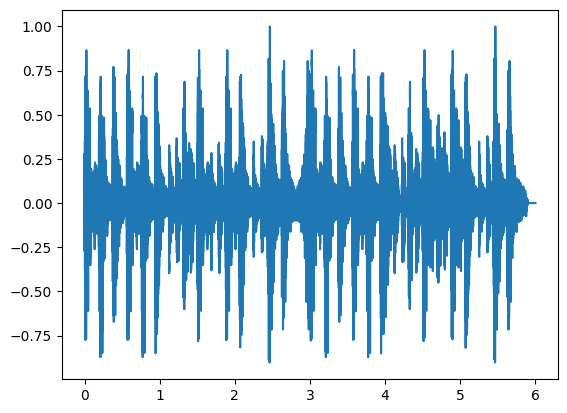

In [2]:
wave = td.read_wave('wavs/263868__kevcio__amen-break-a-160-bpm.wav')
wave.normalize()
wave.plot()

In [3]:
wave.make_audio()

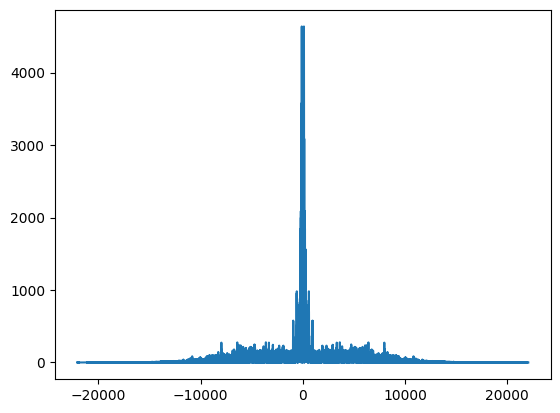

In [4]:
spectrum = wave.make_spectrum(full=True)
spectrum.plot()

Спектр записи.

In [9]:
factor = 20
framerate = wave.framerate / factor
cutoff = framerate / 2 - 1

Применим фильтр для предотвращения биений.

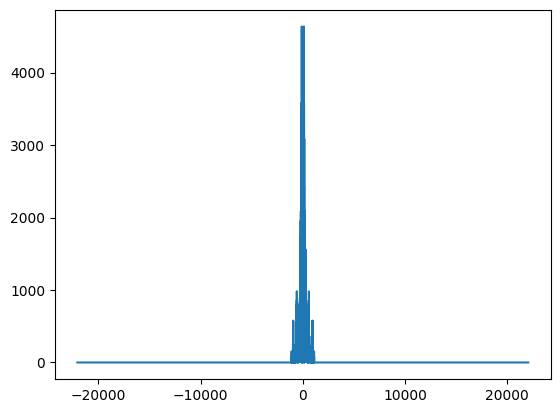

In [10]:
spectrum.low_pass(cutoff)
spectrum.plot()

In [11]:
filtered = spectrum.make_wave()
filtered.make_audio()

Запись теперь звучит сильно приглушённо, но не искажённо.

In [12]:
def sample(wave, factor):
    ys = np.zeros(len(wave))
    ys[::factor] = np.real(wave.ys[::factor])
    return td.Wave(ys, framerate=wave.framerate) 

Функция для симуляции выборки аналогового сигнала.

In [13]:
sampled = sample(filtered, factor)
sampled.make_audio()

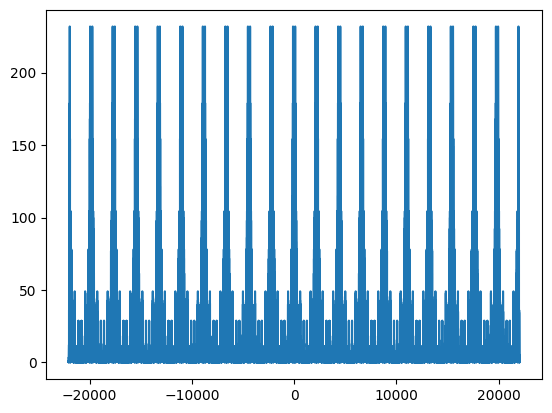

In [18]:
sampled_spectrum = sampled.make_spectrum(full=True)
sampled_spectrum.plot()

Удалим появившиеся копии спектра фильтром НЧ.

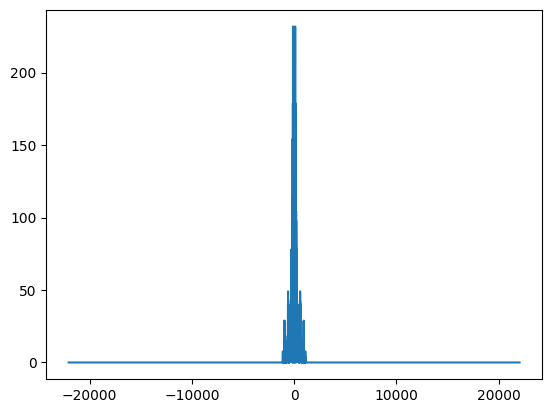

In [19]:
sampled_spectrum.low_pass(cutoff)
sampled_spectrum.plot()

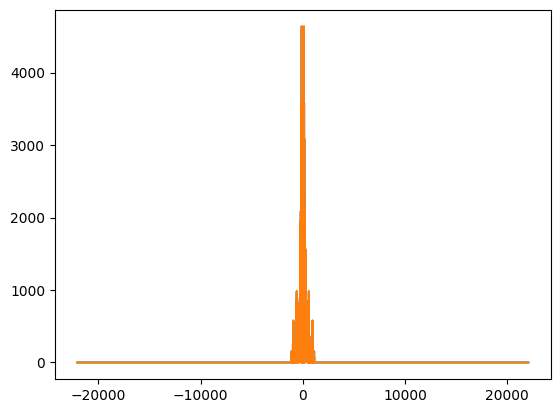

In [20]:
sampled_spectrum.scale(factor)
spectrum.plot()
sampled_spectrum.plot()

In [21]:
spectrum.max_diff(sampled_spectrum)

1.8749713606747085e-12

После масштабирования спектра для возвращения энергии, разница в записях теперь минимальна.

In [22]:
interpolated = sampled_spectrum.make_wave()
interpolated.make_audio()

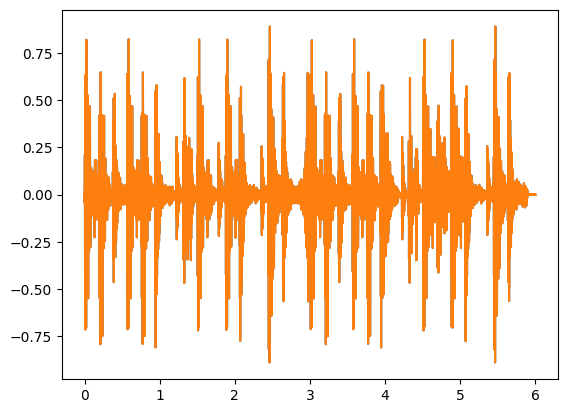

In [23]:
filtered.plot()
interpolated.plot()

Разница в интерполированной и отфильтрованной волнах также очень мала.

In [24]:
filtered.max_diff(interpolated)

5.581291820223251e-16